# Library and Data Imports and Standardization

In [1]:
# Make the imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn as sk

# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Import ordinal encoder
from sklearn.preprocessing import OrdinalEncoder

# Import Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, make_scorer, r2_score, root_mean_squared_error

# Import train test split
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
from pprint import pprint

# Import Gradient Boosting Regressor and Classifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

# Import time
import time

# Import Randomized Search CV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Import confusion matrix
from sklearn.metrics import confusion_matrix

# Import kfold
from sklearn.model_selection import KFold

# Import cross val score
from sklearn.model_selection import cross_val_score

# Import math
import math

# Import log2
from math import log2

# Import classification report
from sklearn.metrics import classification_report

# Import K-means for clustering
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

# Import silhouette_score for clustering evaluation
from sklearn.metrics import silhouette_score

# Import pickle
import pickle

np.random.seed(42)

# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# path = '/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/data/'
path = 'data/'
pickle_path = 'pickle/'
results_path = 'results/'

convabuse_filename = 'convabuse_final.csv'
dghs_filename = 'dynamically_generated_hate_speech_dataset_final.csv'
oaa_filename = 'online_abusive_attacks_final.csv'
us2020hs_filename = 'us_elections_2020_hate_speech_final.csv'
mlma_hate_speech_filename = 'MLMA_hate_speech_final.csv'

In [3]:
# Import the datasets
convabuse = pd.read_csv(f'{path}{convabuse_filename}')
dynamically_generated_hate_speech = pd.read_csv(f'{path}{dghs_filename}')
online_abusive_attacks = pd.read_csv(f'{path}{oaa_filename}')
us_elections_2020_hate_speech = pd.read_csv(f'{path}{us2020hs_filename}')
mlma_hate_speech = pd.read_csv(f'{path}{mlma_hate_speech_filename}')
convabuse_sample = convabuse.sample(frac=0.01, random_state=42)
dynamically_generated_hate_speech_sample = dynamically_generated_hate_speech.sample(frac=0.05, random_state=42)
online_abusive_attacks_sample = online_abusive_attacks.sample(frac=0.01, random_state=42)
us_elections_2020_hate_speech_sample = us_elections_2020_hate_speech.sample(frac=0.01, random_state=42)
mlma_hate_speech_sample = mlma_hate_speech.sample(frac=0.01, random_state=42)

In [4]:
convabuse.head()

,race_or_ethnicity,gender,religion,lgbtq,nationality,age,disability,class,none,abuse_level
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [5]:
convabuse_X = convabuse.drop("abuse_level", axis=1)
convabuse_y = convabuse["abuse_level"]
convabuse_X_sample = convabuse_sample.drop("abuse_level", axis=1)
convabuse_y_sample = convabuse_sample["abuse_level"]

In [6]:
dynamically_generated_hate_speech.head()

,label,type,race_or_ethnicity,gender,religion,lgbtq,nationality,age,disability,class,none,original
0,1.0,-1,0,0,0,1,0,0,0,0,0,0
1,1.0,-1,0,0,0,0,0,0,0,0,0,1
2,1.0,-1,0,0,0,0,0,0,0,0,0,0
3,1.0,0,0,0,0,0,0,0,0,0,1,1
4,1.0,-1,0,0,0,0,0,0,0,0,0,1


In [7]:
dghs_X = dynamically_generated_hate_speech.drop("label", axis=1)
dghs_y = dynamically_generated_hate_speech["label"]
dghs_X_sample = dynamically_generated_hate_speech_sample.drop("label", axis=1)
dghs_y_sample = dynamically_generated_hate_speech_sample["label"]

In [8]:
online_abusive_attacks.head()

,verified,high Identity_Attack,high Insult,high Profanity,high Threat,high other attr,Toxicity
0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,2.0,0.0,10.0,0.0,0.0,1.0
2,0,17.0,1.0,25.0,1.0,0.0,1.0
3,0,9.0,2.0,33.0,2.0,0.0,3.0
4,0,0.0,0.0,7.0,0.0,0.0,0.0


In [9]:
online_abusive_attacks_X = online_abusive_attacks.drop("Toxicity", axis=1)
online_abusive_attacks_y = online_abusive_attacks["Toxicity"]
online_abusive_attacks_X_sample = online_abusive_attacks_sample.drop("Toxicity", axis=1)
online_abusive_attacks_y_sample = online_abusive_attacks_sample["Toxicity"]

In [10]:
us_elections_2020_hate_speech.head()

,Trump,Biden,HOF
0,1.0,4.0,1
1,4.0,0.0,1
2,0.0,1.0,1
3,1.0,4.0,1
4,4.0,1.0,1


In [11]:
us2020hs_X = us_elections_2020_hate_speech.drop("HOF", axis=1)
us2020hs_y = us_elections_2020_hate_speech["HOF"]
us2020hs_X_sample = us_elections_2020_hate_speech_sample.drop("HOF", axis=1)
us2020hs_y_sample = us_elections_2020_hate_speech_sample["HOF"]

In [12]:
mlma_hate_speech.head()

,index,directness,shock_annotator_sentiment,anger_annotator_sentiment,confusion_annotator_sentiment,sadness_annotator_sentiment,indifference_annotator_sentiment,disgust_annotator_sentiment,fear_annotator_sentiment,race_or_ethnicity,gender,religion,lgbtq,nationality,age,disability,class,none,abuse_level
0,7463,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,883,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0
2,5524,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,5323,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,12290,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
mlma_hate_speech_X = mlma_hate_speech.drop("abuse_level", axis=1)
mlma_hate_speech_y = mlma_hate_speech["abuse_level"]
mlma_hate_speech_X_sample = mlma_hate_speech_sample.drop("abuse_level", axis=1)
mlma_hate_speech_y_sample = mlma_hate_speech_sample["abuse_level"]

# Linear Modeling

In [14]:
# Get only the numeric features for each dataset
convabuse_X_numeric = convabuse_X.select_dtypes(include=np.number)
convabuse_X_numeric_sample = convabuse_X_sample.select_dtypes(include=np.number)
dghs_X_numeric = dghs_X.select_dtypes(include=np.number)
dghs_X_numeric_sample = dghs_X_sample.select_dtypes(include=np.number)
online_abusive_attacks_X_numeric = online_abusive_attacks_X.select_dtypes(include=np.number)
online_abusive_attacks_X_numeric_sample = online_abusive_attacks_X_sample.select_dtypes(include=np.number)
us2020hs_X_numeric = us2020hs_X.select_dtypes(include=np.number)
us2020hs_X_numeric_sample = us2020hs_X_sample.select_dtypes(include=np.number)
mlma_hate_speech_X_numeric = mlma_hate_speech_X.select_dtypes(include=np.number)
mlma_hate_speech_X_numeric_sample = mlma_hate_speech_X_sample.select_dtypes(include=np.number)

In [15]:
# Use standard scaler on the Convabuse X data
convabuse_scaler = StandardScaler()
convabuse_X_scaled = convabuse_scaler.fit_transform(convabuse_X_numeric)
convabuse_X_scaled = pd.DataFrame(convabuse_X_scaled, columns=convabuse_X_numeric.columns)

In [16]:
# Use standard scaler on the Convabuse X sample data
convabuse_sample_scaler = StandardScaler()
convabuse_X_scaled_sample = convabuse_sample_scaler.fit_transform(convabuse_X_numeric_sample)
convabuse_X_scaled_sample = pd.DataFrame(convabuse_X_scaled_sample, columns=convabuse_X_numeric_sample.columns)

In [17]:
# Use standard scaler on the Dynamically Generated Hate Speech X data
dghs_scaler = StandardScaler()
dghs_X_scaled = dghs_scaler.fit_transform(dghs_X_numeric)
dghs_X_scaled = pd.DataFrame(dghs_X_scaled, columns=dghs_X_numeric.columns)

In [18]:
# Use standard scaler on the Dynamically Generated Hate Speech X sample data
dghs_sample_scaler = StandardScaler()
dghs_X_scaled_sample = dghs_sample_scaler.fit_transform(dghs_X_numeric_sample)
dghs_X_scaled_sample = pd.DataFrame(dghs_X_scaled_sample, columns=dghs_X_numeric_sample.columns)

In [19]:
# Use standard scaler on the online abusive attacks X data
oaa_scaler = StandardScaler()
online_abusive_attacks_X_scaled = oaa_scaler.fit_transform(online_abusive_attacks_X_numeric)
online_abusive_attacks_X_scaled = pd.DataFrame(online_abusive_attacks_X_scaled, columns=online_abusive_attacks_X_numeric.columns)

In [20]:
# Use standard scaler on the online abusive attacks X sample data
oaa_sample_scaler = StandardScaler()
online_abusive_attacks_X_scaled_sample = oaa_sample_scaler.fit_transform(online_abusive_attacks_X_numeric_sample)
online_abusive_attacks_X_scaled_sample = pd.DataFrame(online_abusive_attacks_X_scaled_sample, columns=online_abusive_attacks_X_numeric_sample.columns)

In [21]:
# Use standard scaler on the US elections 2020 hate speech X data
us2020hs_scaler = StandardScaler()
us2020hs_X_scaled = us2020hs_scaler.fit_transform(us2020hs_X_numeric)
us2020hs_X_scaled = pd.DataFrame(us2020hs_X_scaled, columns=us2020hs_X_numeric.columns)

In [22]:
# Use standard scaler on the US elections 2020 hate speech X sample data
us2020hs_sample_scaler = StandardScaler()
us2020hs_X_scaled_sample = us2020hs_sample_scaler.fit_transform(us2020hs_X_numeric_sample)
us2020hs_X_scaled_sample = pd.DataFrame(us2020hs_X_scaled_sample, columns=us2020hs_X_numeric_sample.columns)

In [23]:
# Use standard scaler on the MLMA hate speech X data
mlma_hate_speech_scaler = StandardScaler()
mlma_hate_speech_X_scaled = mlma_hate_speech_scaler.fit_transform(mlma_hate_speech_X_numeric)
mlma_hate_speech_X_scaled = pd.DataFrame(mlma_hate_speech_X_scaled, columns=mlma_hate_speech_X_numeric.columns)

In [24]:
# Use standard scaler on the MLMA hate speech X sample data
mlma_hate_speech_sample_scaler = StandardScaler()
mlma_hate_speech_X_sample_scaled = mlma_hate_speech_sample_scaler.fit_transform(mlma_hate_speech_X_numeric_sample)
mlma_hate_speech_X_sample_scaled = pd.DataFrame(mlma_hate_speech_X_sample_scaled, columns=mlma_hate_speech_X_numeric_sample.columns)

In [25]:
for columns in [convabuse_X_numeric_sample.columns, dghs_X_numeric_sample.columns, online_abusive_attacks_X_numeric_sample.columns, us2020hs_X_numeric_sample.columns, mlma_hate_speech_X_numeric_sample.columns]:
  print(columns)

Index(['race_or_ethnicity', 'gender', 'religion', 'lgbtq', 'nationality',
       'age', 'disability', 'class', 'none'],
      dtype='object')
Index(['type', 'race_or_ethnicity', 'gender', 'religion', 'lgbtq',
       'nationality', 'age', 'disability', 'class', 'none', 'original'],
      dtype='object')
Index(['verified', 'high Identity_Attack', 'high Insult', 'high Profanity',
       'high Threat', 'high other attr'],
      dtype='object')
Index(['Trump', 'Biden'], dtype='object')
Index(['index', 'directness', 'shock_annotator_sentiment',
       'anger_annotator_sentiment', 'confusion_annotator_sentiment',
       'sadness_annotator_sentiment', 'indifference_annotator_sentiment',
       'disgust_annotator_sentiment', 'fear_annotator_sentiment',
       'race_or_ethnicity', 'gender', 'religion', 'lgbtq', 'nationality',
       'age', 'disability', 'class', 'none'],
      dtype='object')


In [26]:
# Train test split for each dataset
convabuse_X_train, convabuse_X_test, convabuse_y_train, convabuse_y_test = train_test_split(convabuse_X_scaled, convabuse_y, test_size=0.2, random_state=42)
convabuse_X_train_sample, convabuse_X_test_sample, convabuse_y_train_sample, convabuse_y_test_sample = train_test_split(convabuse_X_scaled_sample, convabuse_y_sample, test_size=0.2, random_state=42)

dghs_X_train, dghs_X_test, dghs_y_train, dghs_y_test = train_test_split(dghs_X_scaled, dghs_y, test_size=0.2, random_state=42)
dghs_X_train_sample, dghs_X_test_sample, dghs_y_train_sample, dghs_y_test_sample = train_test_split(dghs_X_scaled_sample, dghs_y_sample, test_size=0.2, random_state=42)

online_abusive_attacks_X_train, online_abusive_attacks_X_test, online_abusive_attacks_y_train, online_abusive_attacks_y_test = train_test_split(online_abusive_attacks_X_scaled, online_abusive_attacks_y, test_size=0.2, random_state=42)
online_abusive_attacks_X_train_sample, online_abusive_attacks_X_test_sample, online_abusive_attacks_y_train_sample, online_abusive_attacks_y_test_sample = train_test_split(online_abusive_attacks_X_scaled_sample, online_abusive_attacks_y_sample, test_size=0.2, random_state=42)

us2020hs_X_train, us2020hs_X_test, us2020hs_y_train, us2020hs_y_test = train_test_split(us2020hs_X_scaled, us2020hs_y, test_size=0.2, random_state=42)
us2020hs_X_train_sample, us2020hs_X_test_sample, us2020hs_y_train_sample, us2020hs_y_test_sample = train_test_split(us2020hs_X_scaled_sample, us2020hs_y_sample, test_size=0.2, random_state=42)

mlma_hate_speech_X_train, mlma_hate_speech_X_test, mlma_hate_speech_y_train, mlma_hate_speech_y_test = train_test_split(mlma_hate_speech_X_scaled, mlma_hate_speech_y, test_size=0.2, random_state=42)
mlma_hate_speech_X_train_sample, mlma_hate_speech_X_test_sample, mlma_hate_speech_y_train_sample, mlma_hate_speech_y_test_sample = train_test_split(mlma_hate_speech_X_sample_scaled, mlma_hate_speech_y_sample, test_size=0.2, random_state=42)

In [27]:
# Get the length of each dataset
convabuse_length = len(convabuse_X_train_sample)
dghs_length = len(dghs_X_train_sample)
online_abusive_attacks_length = len(online_abusive_attacks_X_train_sample)
us2020hs_length = len(us2020hs_X_train_sample)
mlma_hate_speech_length = len(mlma_hate_speech_X_train_sample)

In [28]:
convabuse_log2 = math.ceil(log2(convabuse_length))
convabuse_1_percent = math.ceil(convabuse_length * 0.01)
convabuse_length, convabuse_log2, convabuse_1_percent

(402, 9, 5)

In [29]:
dghs_log2 = math.ceil(log2(dghs_length))
dghs_1_percent = math.ceil(dghs_length * 0.01)
dghs_length, dghs_log2, dghs_1_percent

(1517, 11, 16)

In [30]:
online_abusive_attacks_log2 = math.ceil(log2(online_abusive_attacks_length))
online_abusive_attacks_1_percent = math.ceil(online_abusive_attacks_length * 0.01)
online_abusive_attacks_length, online_abusive_attacks_log2, online_abusive_attacks_1_percent

(19, 5, 1)

In [31]:
us2020hs_log2 = math.ceil(log2(us2020hs_length))
us2020hs_1_percent = math.ceil(us2020hs_length * 0.01)
us2020hs_length, us2020hs_log2, us2020hs_1_percent

(42, 6, 1)

In [32]:
mlma_hate_speech_log2 = math.ceil(log2(mlma_hate_speech_length))
mlma_hate_speech_1_percent = math.ceil(mlma_hate_speech_length * 0.01)
mlma_hate_speech_length, mlma_hate_speech_log2, mlma_hate_speech_1_percent

(427, 9, 5)

In [33]:
kmeans_regression_results_list = []

In [34]:
kmeans_classification_results_list = []

In [35]:
def calculate_kmeans_scores_p1(dataset, X, kmeans_params):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=4, batch_size=1000, random_state=42)

    inertia_list = []
    silhouette_list = []

    for n in kmeans_params['n_clusters']:
        print(f"Running KMeans with n_clusters={n}")
        minibatch_kmeans.set_params(n_clusters=n)
        minibatch_kmeans.fit(X)
        inertia_list.append(minibatch_kmeans.inertia_)
        
        # Calculate silhouette score
        silhouette_avg = silhouette_score(X, minibatch_kmeans.labels_)
        silhouette_list.append(silhouette_avg)

    # Get the smallest inertia value and its index
    print(f"Smallest inertia value: {np.min(inertia_list)} at index {np.argmin(inertia_list)}")
    # Get the best silhouette score and its index
    print(f"Best silhouette score: {np.min(silhouette_list)} at index {np.argmax(silhouette_list)}")

    # Plot the inertia and silhouette scores
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(kmeans_params['n_clusters'], inertia_list, marker='o')
    # Plot a red x at the chosen number of clusters
    chosen_clusters = np.argmax(silhouette_list) + 2
    chosen_clusters_index = kmeans_params['n_clusters'].index(chosen_clusters)
    plt.plot(chosen_clusters_index + 2, inertia_list[chosen_clusters_index], 'rx', markersize=10, label=f'Cluster: {chosen_clusters}')
    plt.legend()
    plt.title(f'{dataset} Grid Search, Part 1:\nInertia vs Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid()
    plt.subplot(1, 2, 2)
    plt.plot(kmeans_params['n_clusters'], silhouette_list, marker='o', color='orange')
    # Plot a red x at the chosen number of clusters
    plt.plot(chosen_clusters_index + 2, silhouette_list[chosen_clusters_index], 'rx', markersize=10, label=f'Cluster: {chosen_clusters}')
    plt.legend()
    plt.title(f'{dataset} Grid Search, Part 1:\nSilhouette Score vs Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.grid()
    plt.tight_layout()
    plt.show()

    return inertia_list, silhouette_list, chosen_clusters

In [36]:
def calculate_kmeans_scores_p2(dataset, X, kmeans_params, chosen_clusters):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=int(chosen_clusters), batch_size=1000, random_state=42)

    # Use a manual for loop to iterate through only the init, max_iter, and n_init parameters to find the best K-Means clustering model for the US Accidents dataset optimized for accuracy
    kmeans_best_score_p2 = 0
    kmeans_best_model_p2 = None
    kmeans_best_params_p2 = None
    kmeans_inertia_p2 = []
    kmeans_silhouette_scores_p2 = []
    for init in kmeans_params['init']:
        for max_iter in kmeans_params['max_iter']:
            for n_init in kmeans_params['n_init']:
                print(f"Running KMeans with n_clusters={int(chosen_clusters)}, init={init}, max_iter={max_iter}, n_init={n_init}")
                minibatch_kmeans.set_params(n_clusters=int(chosen_clusters), init=init, max_iter=max_iter, n_init=n_init)
                minibatch_kmeans.fit(X)
                kmeans_inertia_p2.append(minibatch_kmeans.inertia_)
                
                # Calculate silhouette score
                silhouette_avg = silhouette_score(X, minibatch_kmeans.labels_)
                kmeans_silhouette_scores_p2.append(silhouette_avg)
                
                # Check if this model is better than the previous best
                if silhouette_avg > kmeans_best_score_p2:
                    kmeans_best_score_p2 = silhouette_avg
                    kmeans_best_model_p2 = minibatch_kmeans
                    kmeans_best_params_p2 = {
                        'init': init,
                        'max_iter': max_iter,
                        'n_init': n_init
                    }

    # Get the smallest inertia value and its index
    print(f"Smallest inertia value: {np.min(kmeans_inertia_p2)} at index {np.argmin(kmeans_inertia_p2)}")
    # Get the best silhouette score and its index
    print(f"Best silhouette score: {np.min(kmeans_silhouette_scores_p2)} at index {np.argmax(kmeans_silhouette_scores_p2)}")

    # Plot the inertia and silhouette scores
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(kmeans_inertia_p2, marker='o')
    # Plot a red x at the best inertia point
    plt.plot(np.argmin(kmeans_inertia_p2), kmeans_inertia_p2[np.argmin(kmeans_inertia_p2)], 'rx', markersize=10, label=f'Iteration: {np.argmin(kmeans_inertia_p2) + 1}, Best Inertia: {kmeans_inertia_p2[np.argmin(kmeans_inertia_p2)]}')
    plt.legend()
    plt.title(f'{dataset} Grid Search, Part 2: Inertia Per Grid Search Iteration (Optimized)')
    plt.xlabel('Iteration')    
    plt.ylabel('Inertia')
    plt.grid()
    plt.subplot(1, 2, 2)
    plt.plot(kmeans_silhouette_scores_p2, marker='o', color='orange')
    # Plot a red x at the best silhouette score point
    plt.plot(np.argmax(kmeans_silhouette_scores_p2), kmeans_silhouette_scores_p2[np.argmax(kmeans_silhouette_scores_p2)], 'rx', markersize=10, label=f'Iteration: {np.argmax(kmeans_silhouette_scores_p2) + 1}, Best Silhouette Score: {kmeans_silhouette_scores_p2[np.argmax(kmeans_silhouette_scores_p2)]}')
    plt.legend()
    plt.title(f'{dataset} Grid Search, Part 2: Silhouette Score Per Grid Search Iteration (Optimized)')
    plt.xlabel('Iteration')
    plt.ylabel('Silhouette Score')
    plt.grid()
    plt.tight_layout()
    plt.show()

    return kmeans_inertia_p2, kmeans_silhouette_scores_p2, kmeans_best_score_p2, kmeans_best_params_p2

In [37]:
def best_kmeans_model(dataset, X_train, X_test, best_kmeans_model_params, chosen_clusters):
    # Use the best K-Means clustering model for the US Accidents dataset to predict the clusters
    kmeans_best_model = MiniBatchKMeans().set_params(**best_kmeans_model_params)
    kmeans_best_model.fit(X_train)
    kmeans_best_model_y_pred = kmeans_best_model.predict(X_test)

    # Predict using only chosen clusters without the other parameters
    kmeans_chosen = MiniBatchKMeans(n_clusters=int(chosen_clusters), random_state=42)
    kmeans_chosen.fit(X_train)
    kmeans_chosen_model_y_pred = kmeans_chosen.predict(X_test)

    best_silhouette_score = silhouette_score(X_test, kmeans_best_model_y_pred)
    best_inertia = kmeans_best_model.inertia_
    chosen_silhouette_score = silhouette_score(X_test, kmeans_chosen_model_y_pred)
    chosen_inertia = kmeans_chosen.inertia_

    print(f"Best Model Silhouette Score: {best_silhouette_score:.4f}")
    print(f"Best Model Inertia: {best_inertia:.4f}")
    print(f"Chosen Clusters Silhouette Score: {chosen_silhouette_score:.4f}")
    print(f"Chosen Clusters Inertia: {chosen_inertia:.4f}")

    # Plot the clusters for the US Accidents dataset using the best K-Means clustering model
    plt.figure(figsize=(12, 6))
    plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=kmeans_best_model_y_pred, cmap='viridis', s=10)
    plt.title(f'{dataset} Clusters using Best K-Means Model')
    plt.xlabel('Feature 1 (Standardized)')
    plt.ylabel('Feature 2 (Standardized)')
    plt.colorbar(label='Cluster Label')
    plt.grid()
    plt.show()

    # Plot a box plot for the clusters of the US Accidents dataset using the best K-Means clustering model
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=kmeans_best_model_y_pred, y=X_test.iloc[:, 0], palette='Set3', hue=kmeans_best_model_y_pred)
    plt.title(f'Box Plot of {dataset} Clusters using Best K-Means Model')
    plt.xlabel('Cluster Label')
    plt.ylabel('Feature 1 (Standardized)')
    plt.grid()
    plt.show()

    # Plot the clusters for the US Accidents dataset using the best K-Means clustering model
    plt.figure(figsize=(12, 6))
    plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=kmeans_chosen_model_y_pred, cmap='viridis', s=10)
    plt.title(f'{dataset} Clusters using {chosen_clusters} Clusters K-Means Model')
    plt.xlabel('Feature 1 (Standardized)')
    plt.ylabel('Feature 2 (Standardized)')
    plt.colorbar(label='Cluster Label')
    plt.grid()
    plt.show()

    # Plot a box plot for the clusters of the US Accidents dataset using the 6 clusters K-Means model
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=kmeans_chosen_model_y_pred, y=X_test.iloc[:, 0], palette='Set3', hue=kmeans_chosen_model_y_pred)
    plt.title(f'Box Plot of {dataset} Clusters using {chosen_clusters} Clusters K-Means Model')
    plt.xlabel('Cluster Label')
    plt.ylabel('Feature 1 (Standardized)')
    plt.grid()
    plt.show()

    return best_silhouette_score, best_inertia, chosen_silhouette_score, chosen_inertia

In [38]:
# IMPLEMENTATION TEMPLATE - Split each code block into different cells

# _kmeans_params = {
#     'n_clusters': range(2, 20), # Number of clusters to try
#     'init': ['k-means++'],   # Initialization method
#     'max_iter': range(1, 100),   # Maximum number of iterations
#     'n_init': range(1, 30)
# }

# minibatch__inertia_list_p1, minibatch__silhouette_list_p1, minibatch__chosen_clusters_p1 = calculate_kmeans_scores_p1("", _X_train_sample, _kmeans_params)

# minibatch__inertia_list_p2, minibatch__silhouette_list_p2, minibatch__best_score_p2, minibatch__best_params_p2 = calculate_kmeans_scores_p2("", _X_train_sample, _kmeans_params, minibatch__chosen_clusters_p1)

# minibatch__best_model_silhouette_score, minibatch__best_model_inertia, minibatch__chosen_model_silhouette_score, minibatch__chosen_model_inertia = best_kmeans_model("", _X_train_sample, _X_test_sample, minibatch__best_params_p2, minibatch__chosen_clusters_p1)

## Convabuse Decision Tree

In [39]:
convabuse_kmeans_params = {
    'n_clusters': range(2, 20), # Number of clusters to try
    'init': ['k-means++'],   # Initialization method
    'max_iter': range(1, 100),   # Maximum number of iterations
    'n_init': range(1, 30)
}

Running KMeans with n_clusters=2
Running KMeans with n_clusters=3
Running KMeans with n_clusters=4


  File "c:\Users\Fornesus Powered\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\Fornesus Powered\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Fornesus Powered\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session

Running KMeans with n_clusters=5
Running KMeans with n_clusters=6
Running KMeans with n_clusters=7
Running KMeans with n_clusters=8
Running KMeans with n_clusters=9
Running KMeans with n_clusters=10
Running KMeans with n_clusters=11
Running KMeans with n_clusters=12
Running KMeans with n_clusters=13
Running KMeans with n_clusters=14
Running KMeans with n_clusters=15
Running KMeans with n_clusters=16
Running KMeans with n_clusters=17
Running KMeans with n_clusters=18
Running KMeans with n_clusters=19
Smallest inertia value: 2.124608877450223e-27 at index 11
Best silhouette score: 0.8028955081085246 at index 1


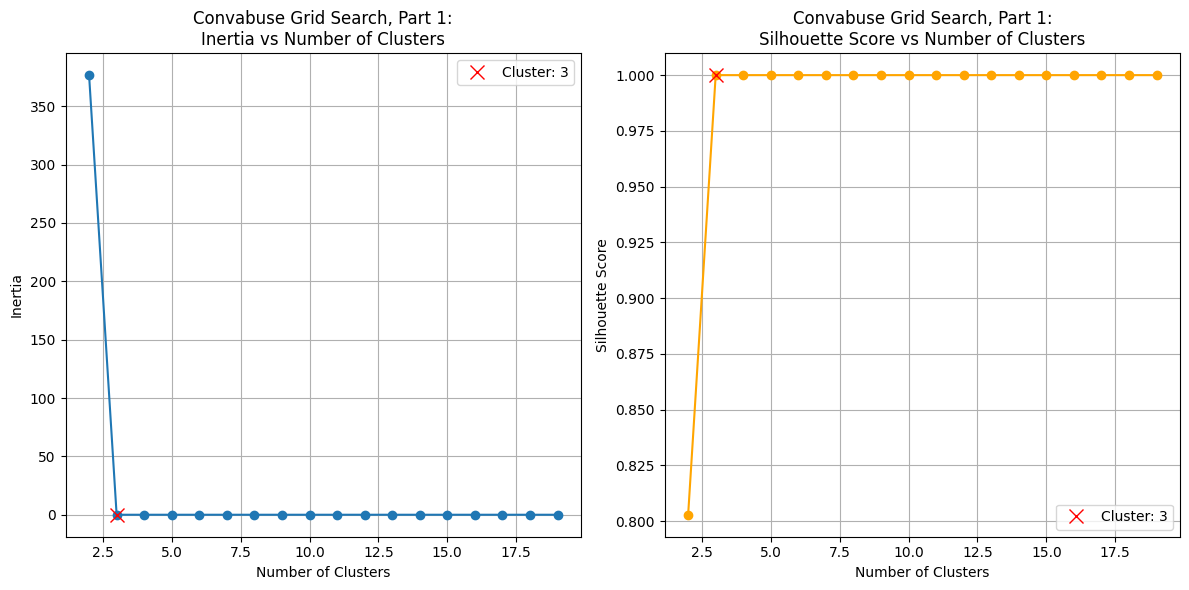

In [40]:
# Calculate the scores for the Convabuse dataset
minibatch_convabuse_inertia_list_p1, minibatch_convabuse_silhouette_list_p1, minibatch_convabuse_chosen_clusters_p1 = calculate_kmeans_scores_p1("Convabuse", convabuse_X_train_sample, convabuse_kmeans_params)

Running KMeans with n_clusters=3, init=k-means++, max_iter=1, n_init=1
Running KMeans with n_clusters=3, init=k-means++, max_iter=1, n_init=2
Running KMeans with n_clusters=3, init=k-means++, max_iter=1, n_init=3
Running KMeans with n_clusters=3, init=k-means++, max_iter=1, n_init=4
Running KMeans with n_clusters=3, init=k-means++, max_iter=1, n_init=5
Running KMeans with n_clusters=3, init=k-means++, max_iter=1, n_init=6
Running KMeans with n_clusters=3, init=k-means++, max_iter=1, n_init=7
Running KMeans with n_clusters=3, init=k-means++, max_iter=1, n_init=8
Running KMeans with n_clusters=3, init=k-means++, max_iter=1, n_init=9
Running KMeans with n_clusters=3, init=k-means++, max_iter=1, n_init=10
Running KMeans with n_clusters=3, init=k-means++, max_iter=1, n_init=11
Running KMeans with n_clusters=3, init=k-means++, max_iter=1, n_init=12
Running KMeans with n_clusters=3, init=k-means++, max_iter=1, n_init=13
Running KMeans with n_clusters=3, init=k-means++, max_iter=1, n_init=14
R

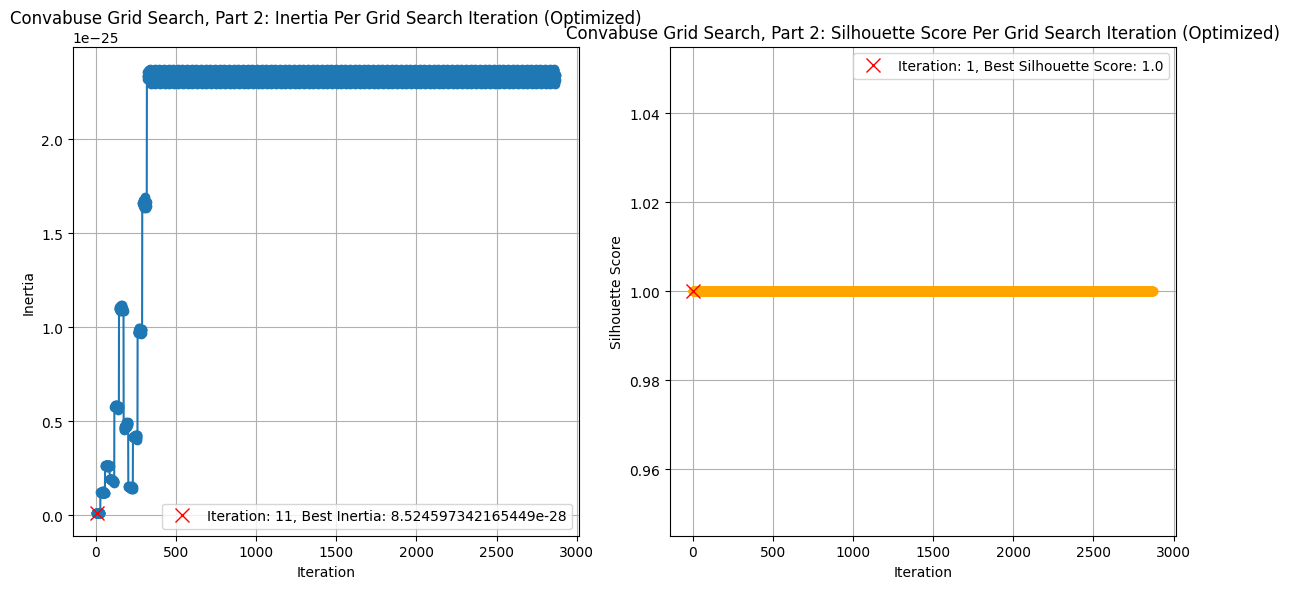

In [41]:
# Calculate the scores for the Convabuse dataset
minibatch_convabuse_inertia_list_p2, minibatch_convabuse_silhouette_list_p2, minibatch_convabuse_best_score_p2, minibatch_convabuse_best_params_p2 = calculate_kmeans_scores_p2("Convabuse", convabuse_X_train_sample, convabuse_kmeans_params, minibatch_convabuse_chosen_clusters_p1)

Best Model Silhouette Score: 1.0000
Best Model Inertia: 0.0000
Chosen Clusters Silhouette Score: 1.0000
Chosen Clusters Inertia: 0.0000


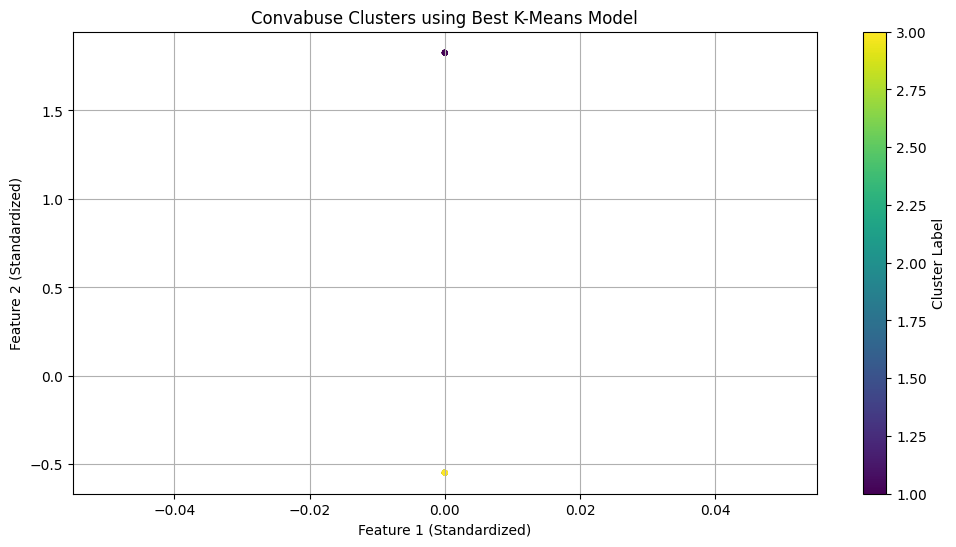

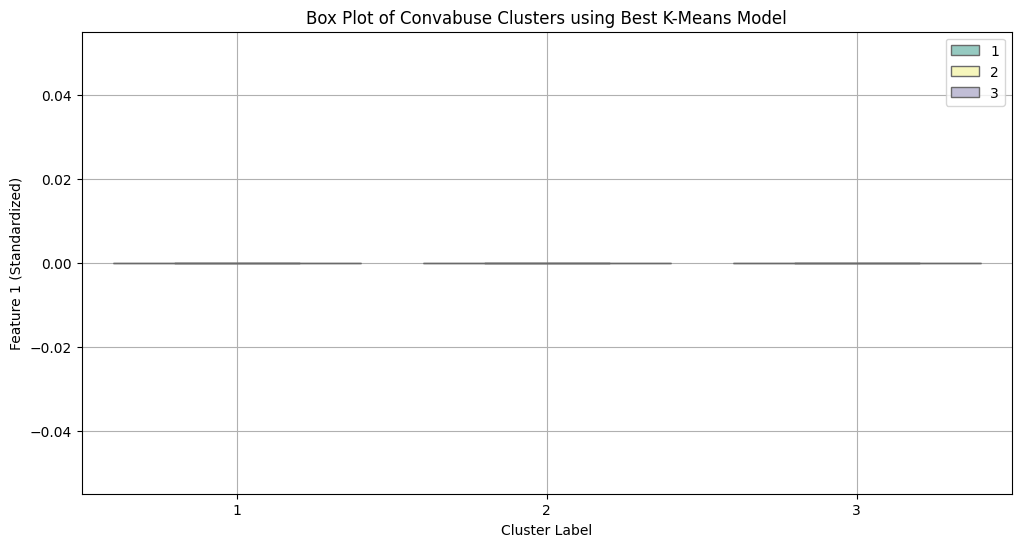

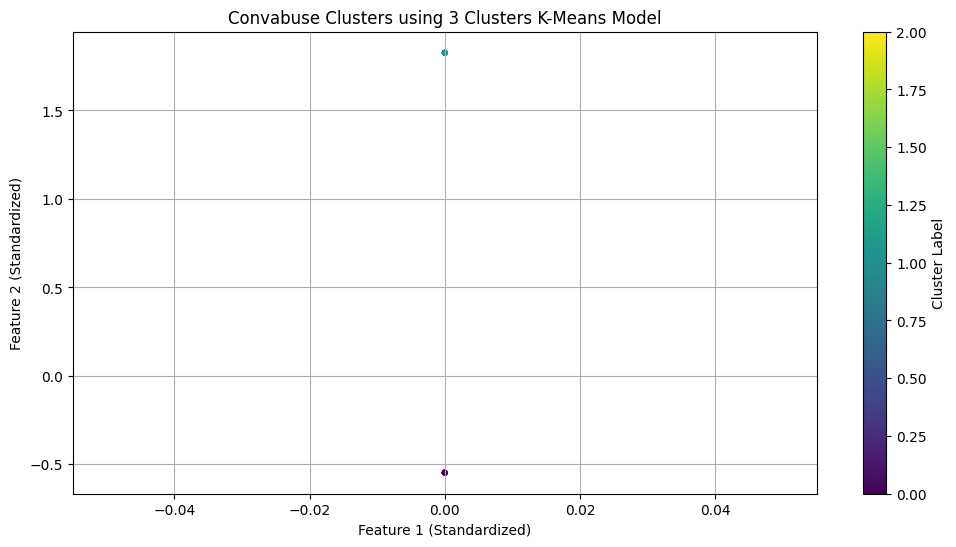

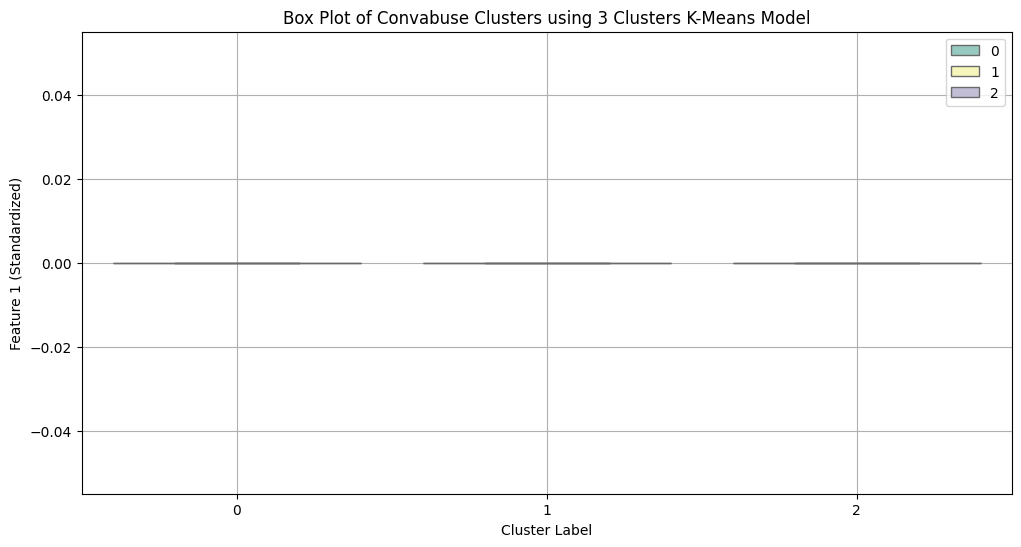

In [42]:
minibatch_convabuse_best_model_silhouette_score, minibatch_convabuse_best_model_inertia, minibatch_convabuse_chosen_model_silhouette_score, minibatch_convabuse_chosen_model_inertia = best_kmeans_model("Convabuse", convabuse_X_train_sample, convabuse_X_test_sample, minibatch_convabuse_best_params_p2, minibatch_convabuse_chosen_clusters_p1)

In [43]:
dghs_kmeans_params = {
    'n_clusters': range(2, 20), # Number of clusters to try
    'init': ['k-means++'],   # Initialization method
    'max_iter': range(1, 100),   # Maximum number of iterations
    'n_init': range(1, 30)
}

Running KMeans with n_clusters=2
Running KMeans with n_clusters=3
Running KMeans with n_clusters=4
Running KMeans with n_clusters=5
Running KMeans with n_clusters=6
Running KMeans with n_clusters=7
Running KMeans with n_clusters=8
Running KMeans with n_clusters=9
Running KMeans with n_clusters=10
Running KMeans with n_clusters=11
Running KMeans with n_clusters=12
Running KMeans with n_clusters=13
Running KMeans with n_clusters=14
Running KMeans with n_clusters=15
Running KMeans with n_clusters=16
Running KMeans with n_clusters=17
Running KMeans with n_clusters=18
Running KMeans with n_clusters=19
Smallest inertia value: 21.916427868222964 at index 15
Best silhouette score: 0.4641768506546157 at index 15


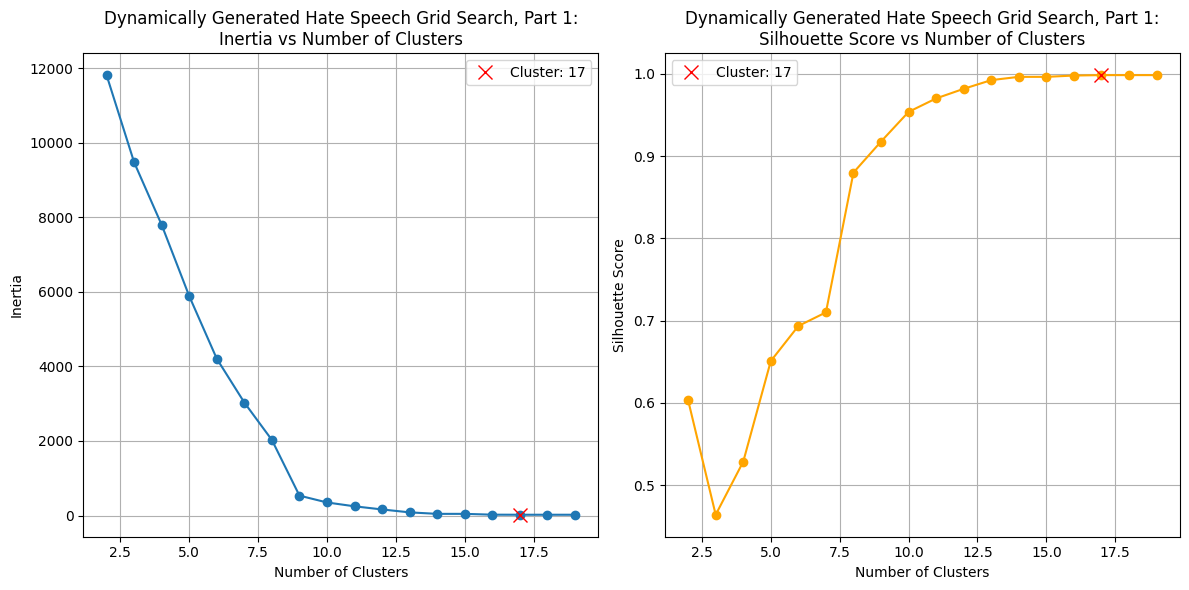

In [44]:
minibatch_dghs_inertia_list_p1, minibatch_dghs_silhouette_list_p1, minibatch_dghs_chosen_clusters_p1 = calculate_kmeans_scores_p1("Dynamically Generated Hate Speech", dghs_X_train_sample, dghs_kmeans_params)

Running KMeans with n_clusters=17, init=k-means++, max_iter=1, n_init=1
Running KMeans with n_clusters=17, init=k-means++, max_iter=1, n_init=2
Running KMeans with n_clusters=17, init=k-means++, max_iter=1, n_init=3
Running KMeans with n_clusters=17, init=k-means++, max_iter=1, n_init=4
Running KMeans with n_clusters=17, init=k-means++, max_iter=1, n_init=5
Running KMeans with n_clusters=17, init=k-means++, max_iter=1, n_init=6
Running KMeans with n_clusters=17, init=k-means++, max_iter=1, n_init=7
Running KMeans with n_clusters=17, init=k-means++, max_iter=1, n_init=8
Running KMeans with n_clusters=17, init=k-means++, max_iter=1, n_init=9
Running KMeans with n_clusters=17, init=k-means++, max_iter=1, n_init=10
Running KMeans with n_clusters=17, init=k-means++, max_iter=1, n_init=11
Running KMeans with n_clusters=17, init=k-means++, max_iter=1, n_init=12
Running KMeans with n_clusters=17, init=k-means++, max_iter=1, n_init=13
Running KMeans with n_clusters=17, init=k-means++, max_iter=

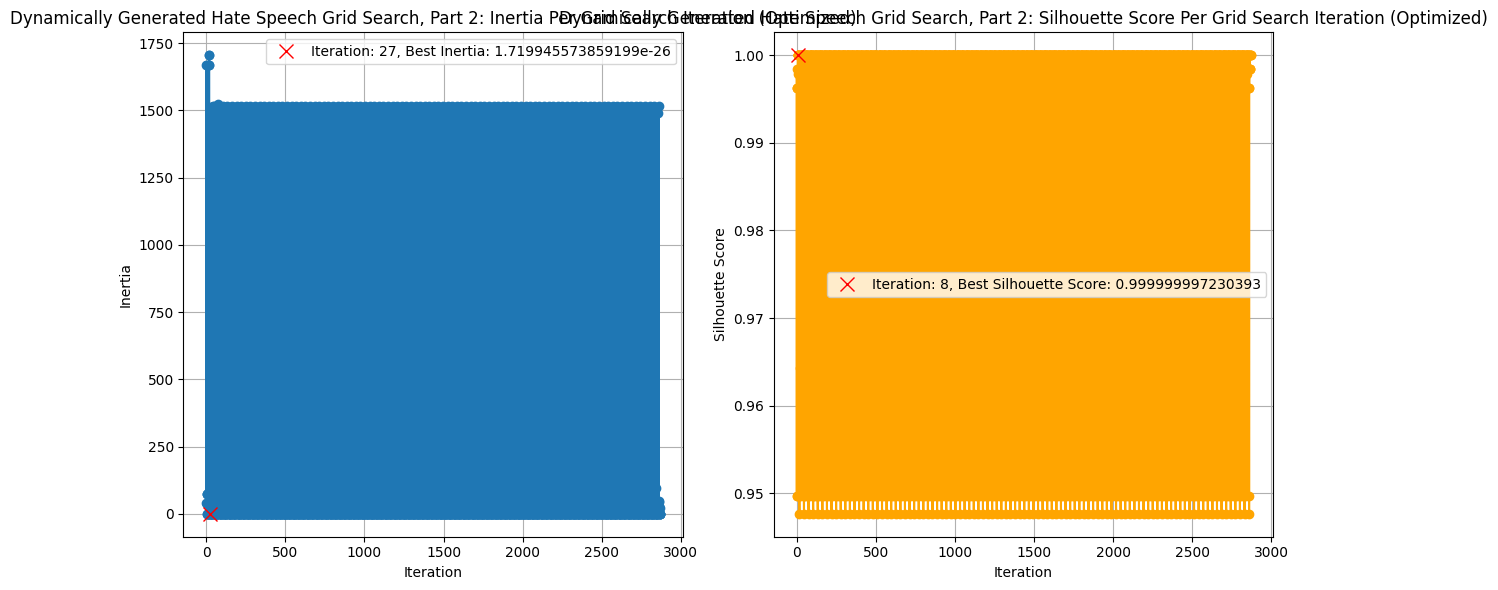

In [45]:
minibatch_dghs_inertia_list_p2, minibatch_dghs_silhouette_list_p2, minibatch_dghs_best_score_p2, minibatch_dghs_best_params_p2 = calculate_kmeans_scores_p2("Dynamically Generated Hate Speech", dghs_X_train_sample, dghs_kmeans_params, minibatch_dghs_chosen_clusters_p1)

Best Model Silhouette Score: 0.8438
Best Model Inertia: 1681.3139
Chosen Clusters Silhouette Score: 0.9988
Chosen Clusters Inertia: 21.9441


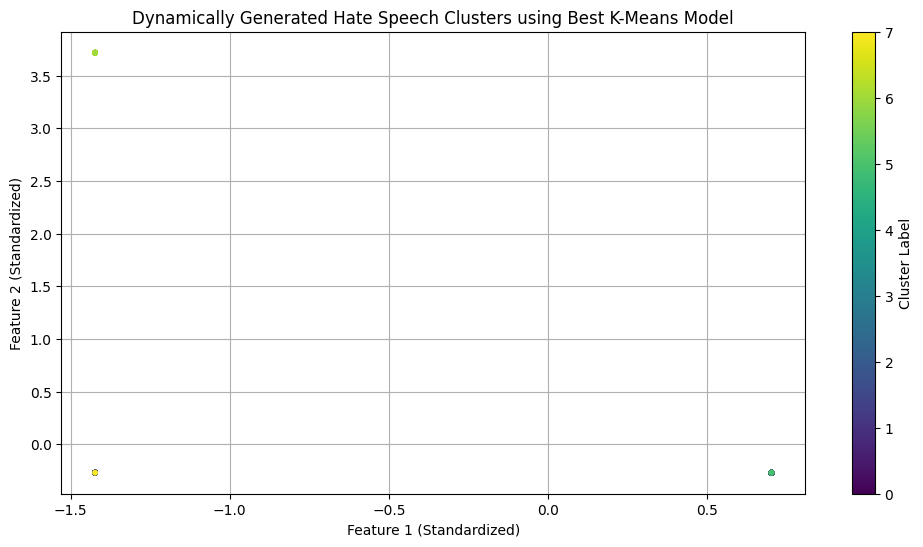

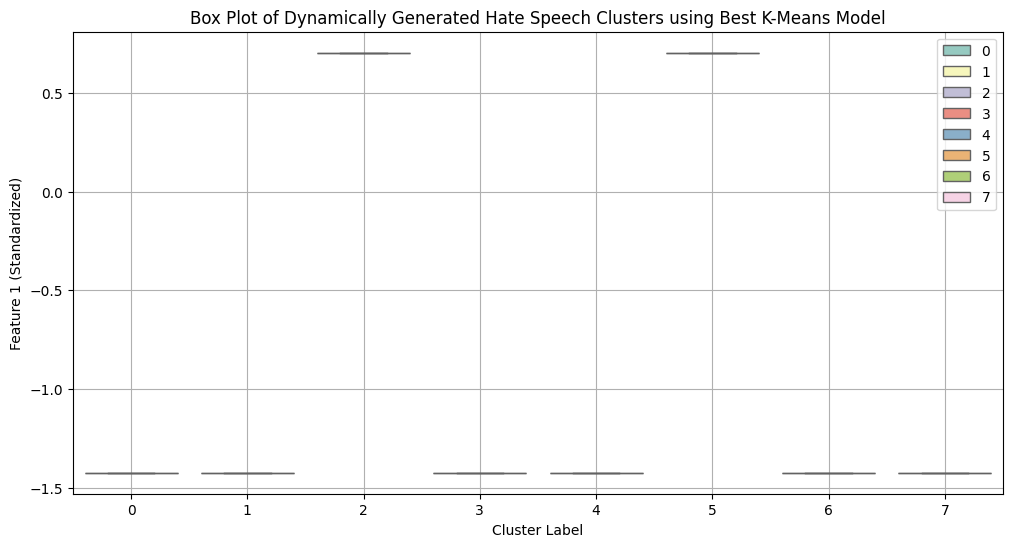

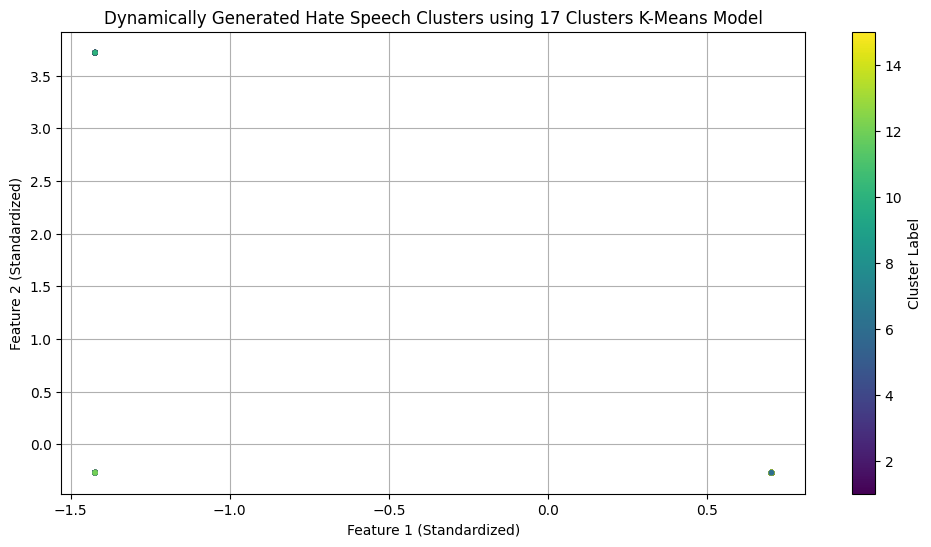

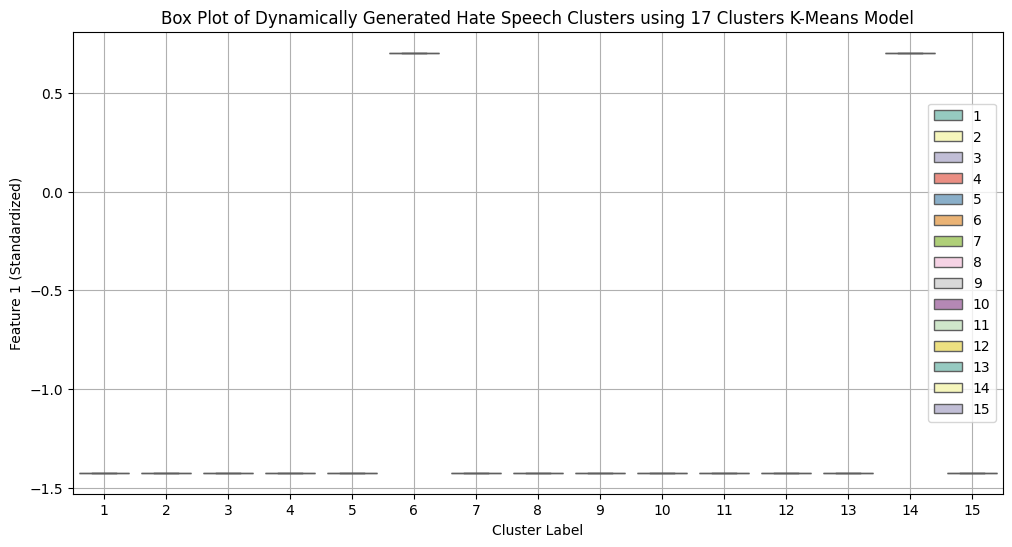

In [46]:
minibatch_dghs_best_model_silhouette_score, minibatch_dghs_best_model_inertia, minibatch_dghs_chosen_model_silhouette_score, minibatch_dghs_chosen_model_inertia = best_kmeans_model("Dynamically Generated Hate Speech", dghs_X_train_sample, dghs_X_test_sample, minibatch_dghs_best_params_p2, minibatch_dghs_chosen_clusters_p1)

In [47]:
online_abusive_attacks_kmeans_params = {
    'n_clusters': range(2, 20), # Number of clusters to try
    'init': ['k-means++'],   # Initialization method
    'max_iter': range(1, 100),   # Maximum number of iterations
    'n_init': range(1, 30)
}

In [48]:
def oaa_calculate_kmeans_scores_p1(dataset, X, kmeans_params):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=4, batch_size=1000, random_state=42)

    inertia_list = []
    silhouette_list = []

    for n in [int(c) for c in kmeans_params['n_clusters'] if 2 <= int(c) <= len(X) - 1]:
        print(f"Running KMeans with n_clusters={n}")
        minibatch_kmeans.set_params(n_clusters=n)
        minibatch_kmeans.fit(X)
        inertia_list.append(minibatch_kmeans.inertia_)
        
        # Calculate silhouette score
        labels = minibatch_kmeans.labels_
        silhouette_avg = silhouette_score(X, labels) if 1 < len(set(labels)) < len(labels) else float('nan')
        silhouette_list.append(silhouette_avg)

    # Get the smallest inertia value and its index
    print(f"Smallest inertia value: {np.min(inertia_list)} at index {np.argmin(inertia_list)}")
    # Get the best silhouette score and its index
    print(f"Best silhouette score: {np.min(silhouette_list)} at index {np.argmax(silhouette_list)}")

    # Plot the inertia and silhouette scores
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot([int(c) for c in kmeans_params['n_clusters'] if 2 <= int(c) <= len(X) - 1], inertia_list, marker='o')
    # Plot a red x at the chosen number of clusters
    chosen_clusters = np.argmax(silhouette_list) + 2
    chosen_clusters_index = kmeans_params['n_clusters'].index(chosen_clusters)
    plt.plot(chosen_clusters_index + 2, inertia_list[chosen_clusters_index], 'rx', markersize=10, label=f'Cluster: {chosen_clusters}')
    plt.legend()
    plt.title(f'{dataset} Grid Search, Part 1:\nInertia vs Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid()
    plt.subplot(1, 2, 2)
    plt.plot([int(c) for c in kmeans_params['n_clusters'] if 2 <= int(c) <= len(X) - 1], silhouette_list, marker='o')
    # Plot a red x at the chosen number of clusters
    plt.plot(chosen_clusters_index + 2, silhouette_list[chosen_clusters_index], 'rx', markersize=10, label=f'Cluster: {chosen_clusters}')
    plt.legend()
    plt.title(f'{dataset} Grid Search, Part 1:\nSilhouette Score vs Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.grid()
    plt.tight_layout()
    plt.show()

    return inertia_list, silhouette_list, chosen_clusters

Running KMeans with n_clusters=2
Running KMeans with n_clusters=3
Running KMeans with n_clusters=4
Running KMeans with n_clusters=5
Running KMeans with n_clusters=6
Running KMeans with n_clusters=7
Running KMeans with n_clusters=8
Running KMeans with n_clusters=9
Running KMeans with n_clusters=10
Running KMeans with n_clusters=11
Running KMeans with n_clusters=12
Running KMeans with n_clusters=13
Running KMeans with n_clusters=14
Running KMeans with n_clusters=15
Running KMeans with n_clusters=16
Running KMeans with n_clusters=17
Running KMeans with n_clusters=18
Smallest inertia value: 0.010120577189167824 at index 4
Best silhouette score: 0.7522281669862653 at index 0


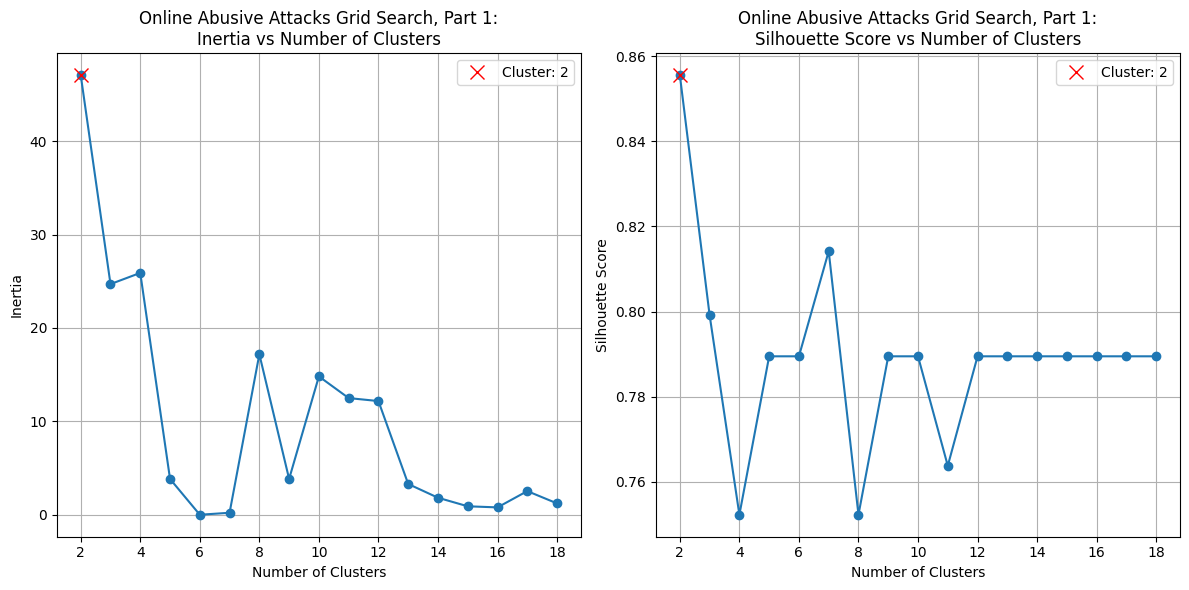

In [49]:
minibatch_online_abusive_attacks_inertia_list_p1, minibatch_online_abusive_attacks_silhouette_list_p1, minibatch_online_abusive_attacks_chosen_clusters_p1 = oaa_calculate_kmeans_scores_p1("Online Abusive Attacks", online_abusive_attacks_X_train_sample, online_abusive_attacks_kmeans_params)

In [50]:
def oaa_calculate_kmeans_scores_p2(dataset, X, kmeans_params, chosen_clusters):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=4, batch_size=1000, random_state=42)

    # Use a manual for loop to iterate through only the init, max_iter, and n_init parameters to find the best K-Means clustering model for the US Accidents dataset optimized for accuracy
    kmeans_best_score_p2 = 0
    kmeans_best_model_p2 = None
    kmeans_best_params_p2 = None
    kmeans_inertia_p2 = []
    kmeans_silhouette_scores_p2 = []
    for init in kmeans_params['init']:
        for max_iter in kmeans_params['max_iter']:
            for n_init in kmeans_params['n_init']:
                print(f"Running KMeans with n_clusters={chosen_clusters}, init={init}, max_iter={max_iter}, n_init={n_init}")
                minibatch_kmeans.set_params(n_clusters=int(chosen_clusters), init=init, max_iter=max_iter, n_init=n_init)
                minibatch_kmeans.fit(X)
                kmeans_inertia_p2.append(minibatch_kmeans.inertia_)
                
                # Calculate silhouette score
                labels = minibatch_kmeans.labels_
                silhouette_avg = silhouette_score(X, labels) if 1 < len(set(labels)) < len(labels) else float('nan')
                kmeans_silhouette_scores_p2.append(silhouette_avg)
                
                # Check if this model is better than the previous best
                if silhouette_avg > kmeans_best_score_p2:
                    kmeans_best_score_p2 = silhouette_avg
                    kmeans_best_model_p2 = minibatch_kmeans
                    kmeans_best_params_p2 = {
                        'init': init,
                        'max_iter': max_iter,
                        'n_init': n_init
                    }

    # Get the smallest inertia value and its index
    print(f"Smallest inertia value: {np.min(kmeans_inertia_p2)} at index {np.argmin(kmeans_inertia_p2)}")
    # Get the best silhouette score and its index
    print(f"Best silhouette score: {np.max(kmeans_silhouette_scores_p2)} at index {np.argmax(kmeans_silhouette_scores_p2)}")

    # Plot the inertia and silhouette scores
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(kmeans_inertia_p2, marker='o')
    # Plot a red x at the best inertia point
    plt.plot(np.argmin(kmeans_inertia_p2), kmeans_inertia_p2[np.argmin(kmeans_inertia_p2)], 'rx', markersize=10, label=f'Iteration: {np.argmin(kmeans_inertia_p2) + 1}, Best Inertia: {kmeans_inertia_p2[np.argmin(kmeans_inertia_p2)]}')
    plt.legend()
    plt.title(f'{dataset} Grid Search, Part 2: Inertia Per Grid Search Iteration (Optimized)')
    plt.xlabel('Iteration')    
    plt.ylabel('Inertia')
    plt.grid()
    plt.subplot(1, 2, 2)
    plt.plot(kmeans_silhouette_scores_p2, marker='o', color='orange')
    # Plot a red x at the best silhouette score point
    plt.plot(np.argmax(kmeans_silhouette_scores_p2), kmeans_silhouette_scores_p2[np.argmax(kmeans_silhouette_scores_p2)], 'rx', markersize=10, label=f'Iteration: {np.argmax(kmeans_silhouette_scores_p2) + 1}, Best Silhouette Score: {kmeans_silhouette_scores_p2[np.argmax(kmeans_silhouette_scores_p2)]}')
    plt.legend()
    plt.title(f'{dataset} Grid Search, Part 2: Silhouette Score Per Grid Search Iteration (Optimized)')
    plt.xlabel('Iteration')
    plt.ylabel('Silhouette Score')
    plt.grid()
    plt.tight_layout()
    plt.show()

    return kmeans_inertia_p2, kmeans_silhouette_scores_p2, kmeans_best_score_p2, kmeans_best_params_p2

Running KMeans with n_clusters=2, init=k-means++, max_iter=1, n_init=1
Running KMeans with n_clusters=2, init=k-means++, max_iter=1, n_init=2
Running KMeans with n_clusters=2, init=k-means++, max_iter=1, n_init=3
Running KMeans with n_clusters=2, init=k-means++, max_iter=1, n_init=4
Running KMeans with n_clusters=2, init=k-means++, max_iter=1, n_init=5
Running KMeans with n_clusters=2, init=k-means++, max_iter=1, n_init=6
Running KMeans with n_clusters=2, init=k-means++, max_iter=1, n_init=7
Running KMeans with n_clusters=2, init=k-means++, max_iter=1, n_init=8
Running KMeans with n_clusters=2, init=k-means++, max_iter=1, n_init=9
Running KMeans with n_clusters=2, init=k-means++, max_iter=1, n_init=10
Running KMeans with n_clusters=2, init=k-means++, max_iter=1, n_init=11
Running KMeans with n_clusters=2, init=k-means++, max_iter=1, n_init=12
Running KMeans with n_clusters=2, init=k-means++, max_iter=1, n_init=13
Running KMeans with n_clusters=2, init=k-means++, max_iter=1, n_init=14
R

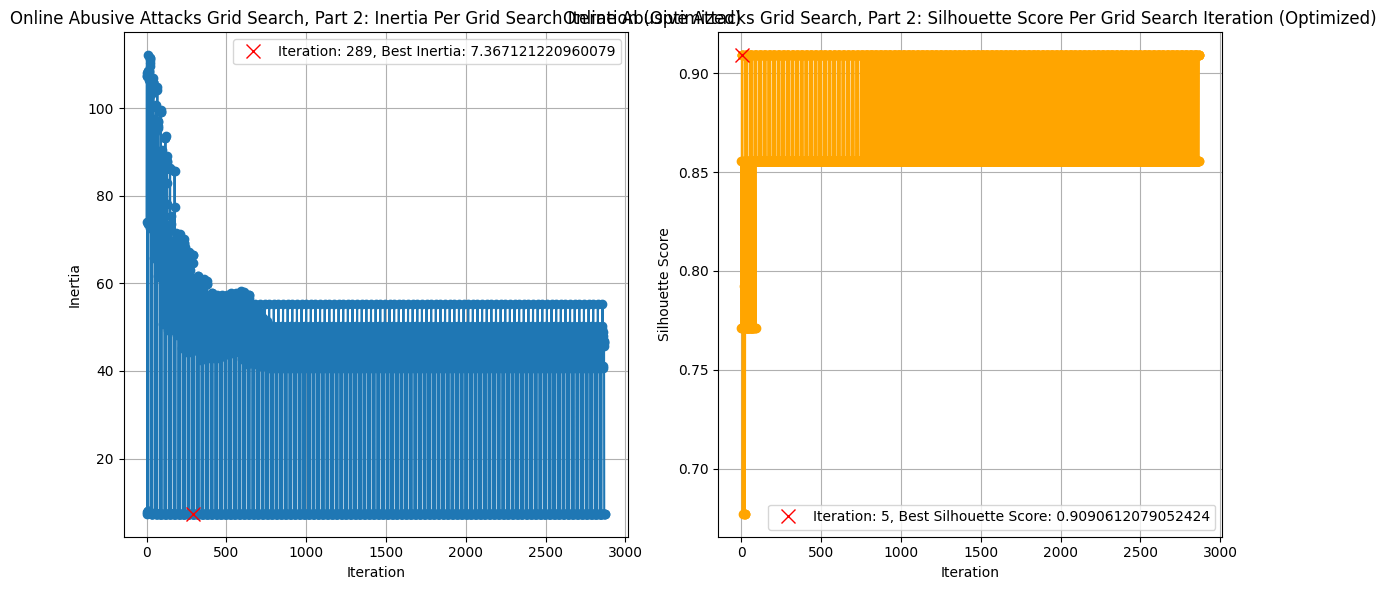

In [51]:
minibatch_online_abusive_attacks_inertia_list_p2, minibatch_online_abusive_attacks_silhouette_list_p2, minibatch_online_abusive_attacks_best_score_p2, minibatch_online_abusive_attacks_best_params_p2 = oaa_calculate_kmeans_scores_p2("Online Abusive Attacks", online_abusive_attacks_X_train_sample, online_abusive_attacks_kmeans_params, minibatch_online_abusive_attacks_chosen_clusters_p1)

In [53]:
us2020hs_kmeans_params = {
    'n_clusters': range(2, 20), # Number of clusters to try
    'init': ['k-means++'],   # Initialization method
    'max_iter': range(1, 100),   # Maximum number of iterations
    'n_init': range(1, 30)
}

Running KMeans with n_clusters=2
Running KMeans with n_clusters=3
Running KMeans with n_clusters=4
Running KMeans with n_clusters=5
Running KMeans with n_clusters=6
Running KMeans with n_clusters=7
Running KMeans with n_clusters=8
Running KMeans with n_clusters=9
Running KMeans with n_clusters=10
Running KMeans with n_clusters=11
Running KMeans with n_clusters=12
Running KMeans with n_clusters=13
Running KMeans with n_clusters=14
Running KMeans with n_clusters=15
Running KMeans with n_clusters=16
Running KMeans with n_clusters=17
Running KMeans with n_clusters=18
Running KMeans with n_clusters=19
Smallest inertia value: 0.2562955681906917 at index 13
Best silhouette score: 0.5354162823665528 at index 14


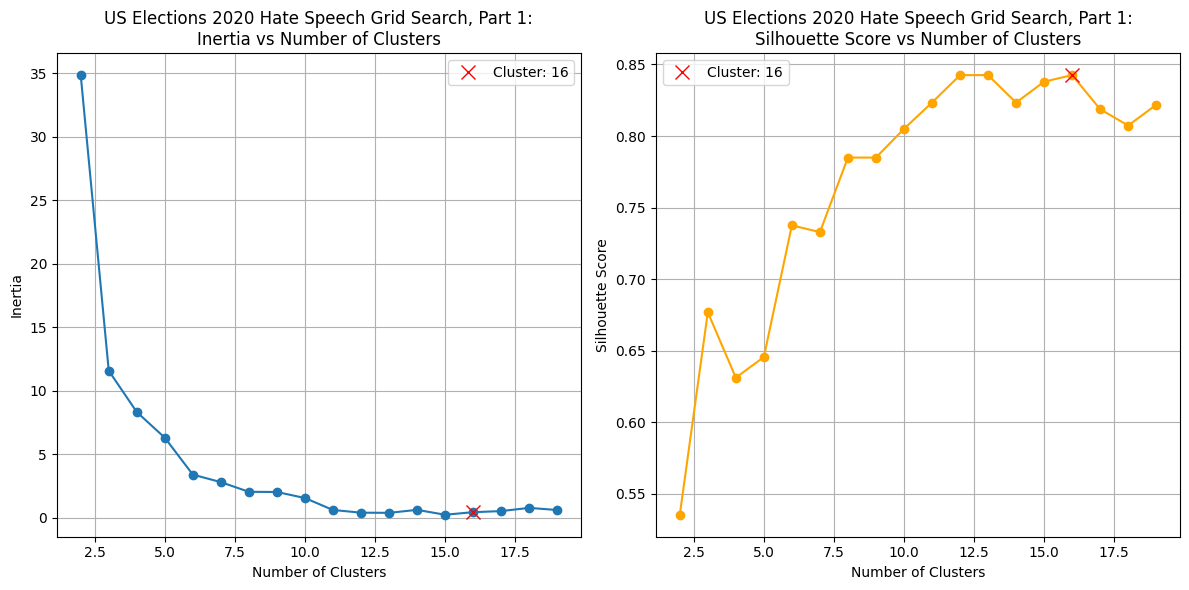

In [54]:
minibatch_us2020hs_inertia_list_p1, minibatch_us2020hs_silhouette_list_p1, minibatch_us2020hs_chosen_clusters_p1 = calculate_kmeans_scores_p1("US Elections 2020 Hate Speech", us2020hs_X_train_sample, us2020hs_kmeans_params)

Running KMeans with n_clusters=16, init=k-means++, max_iter=1, n_init=1
Running KMeans with n_clusters=16, init=k-means++, max_iter=1, n_init=2
Running KMeans with n_clusters=16, init=k-means++, max_iter=1, n_init=3
Running KMeans with n_clusters=16, init=k-means++, max_iter=1, n_init=4
Running KMeans with n_clusters=16, init=k-means++, max_iter=1, n_init=5
Running KMeans with n_clusters=16, init=k-means++, max_iter=1, n_init=6
Running KMeans with n_clusters=16, init=k-means++, max_iter=1, n_init=7
Running KMeans with n_clusters=16, init=k-means++, max_iter=1, n_init=8
Running KMeans with n_clusters=16, init=k-means++, max_iter=1, n_init=9
Running KMeans with n_clusters=16, init=k-means++, max_iter=1, n_init=10
Running KMeans with n_clusters=16, init=k-means++, max_iter=1, n_init=11
Running KMeans with n_clusters=16, init=k-means++, max_iter=1, n_init=12
Running KMeans with n_clusters=16, init=k-means++, max_iter=1, n_init=13
Running KMeans with n_clusters=16, init=k-means++, max_iter=

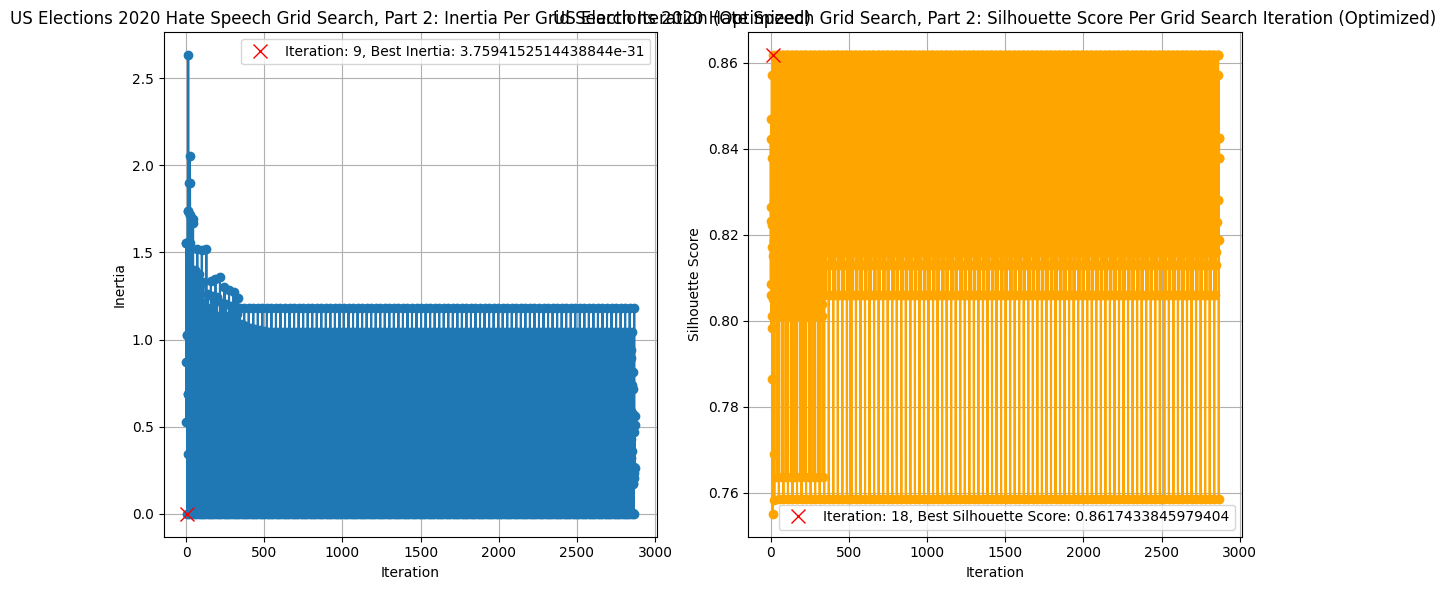

In [55]:
minibatch_us2020hs_inertia_list_p2, minibatch_us2020hs_silhouette_list_p2, minibatch_us2020hs_best_score_p2, minibatch_us2020hs_best_params_p2 = calculate_kmeans_scores_p2("US Elections 2020 Hate Speech", us2020hs_X_train_sample, us2020hs_kmeans_params, minibatch_us2020hs_chosen_clusters_p1)

Best Model Silhouette Score: 0.8610
Best Model Inertia: 2.9945
Chosen Clusters Silhouette Score: 0.7273
Chosen Clusters Inertia: 0.4574


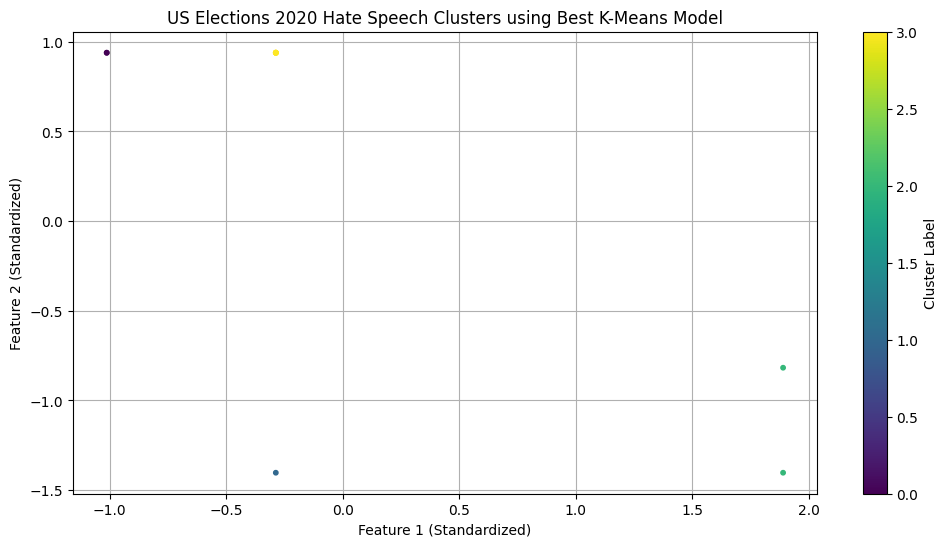

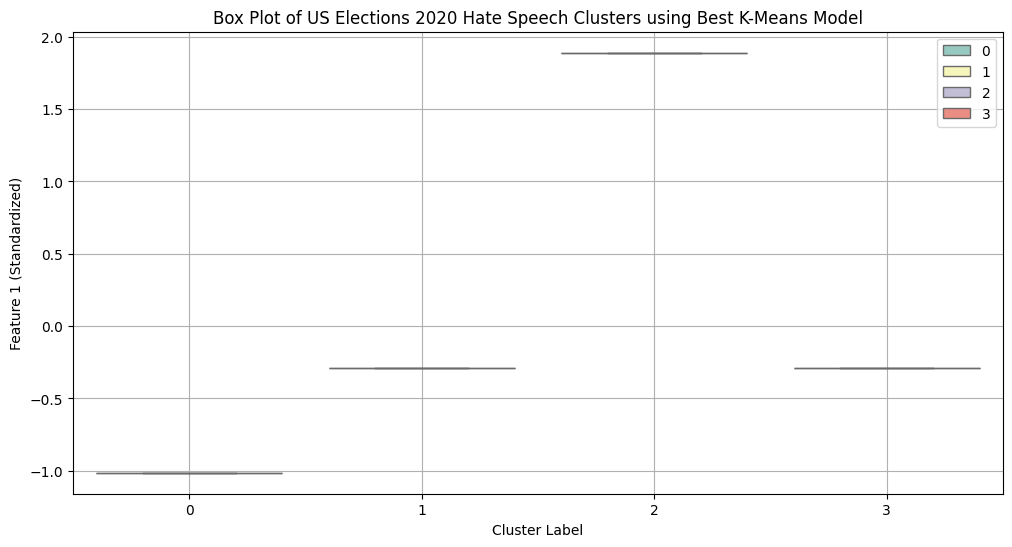

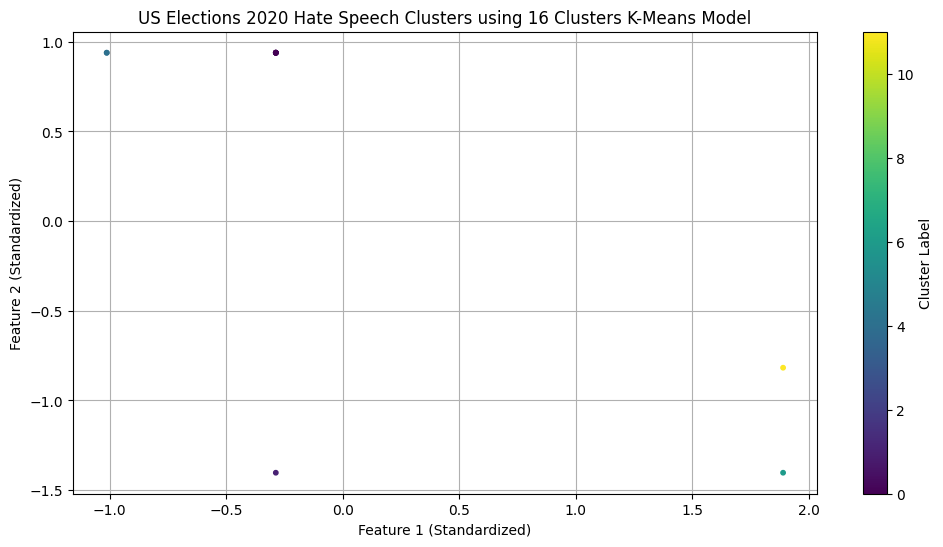

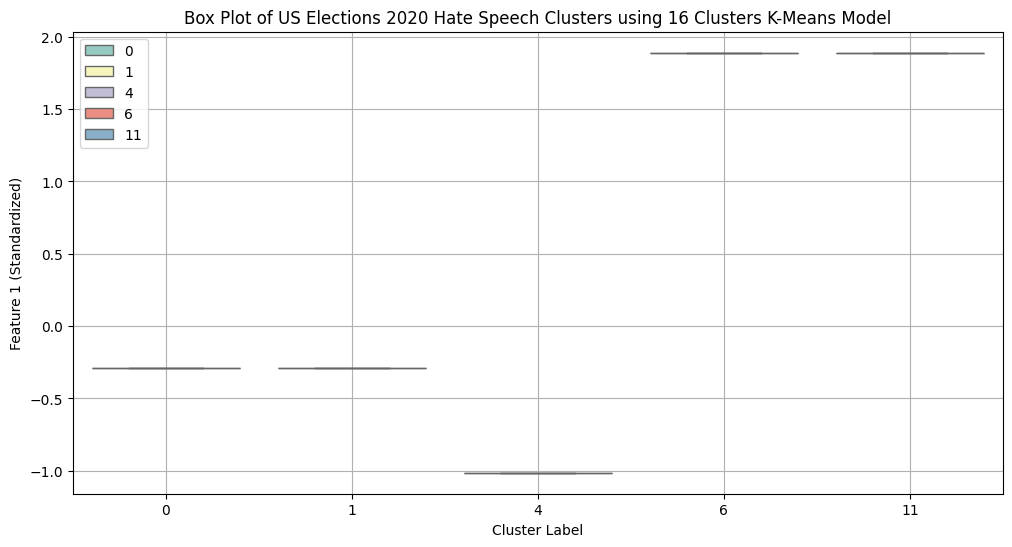

In [56]:
minibatch_us2020hs_best_model_silhouette_score, minibatch_us2020hs_best_model_inertia, minibatch_us2020hs_chosen_model_silhouette_score, minibatch_us2020hs_chosen_model_inertia = best_kmeans_model("US Elections 2020 Hate Speech", us2020hs_X_train_sample, us2020hs_X_test_sample, minibatch_us2020hs_best_params_p2, minibatch_us2020hs_chosen_clusters_p1)

In [57]:
mlma_hate_speech_kmeans_params = {
    'n_clusters': range(2, 20), # Number of clusters to try
    'init': ['k-means++'],   # Initialization method
    'max_iter': range(1, 100),   # Maximum number of iterations
    'n_init': range(1, 30)
}

Running KMeans with n_clusters=2
Running KMeans with n_clusters=3
Running KMeans with n_clusters=4
Running KMeans with n_clusters=5
Running KMeans with n_clusters=6
Running KMeans with n_clusters=7
Running KMeans with n_clusters=8
Running KMeans with n_clusters=9
Running KMeans with n_clusters=10
Running KMeans with n_clusters=11
Running KMeans with n_clusters=12
Running KMeans with n_clusters=13
Running KMeans with n_clusters=14
Running KMeans with n_clusters=15
Running KMeans with n_clusters=16
Running KMeans with n_clusters=17
Running KMeans with n_clusters=18
Running KMeans with n_clusters=19
Smallest inertia value: 2679.2388651315546 at index 17
Best silhouette score: 0.07940617983072684 at index 17


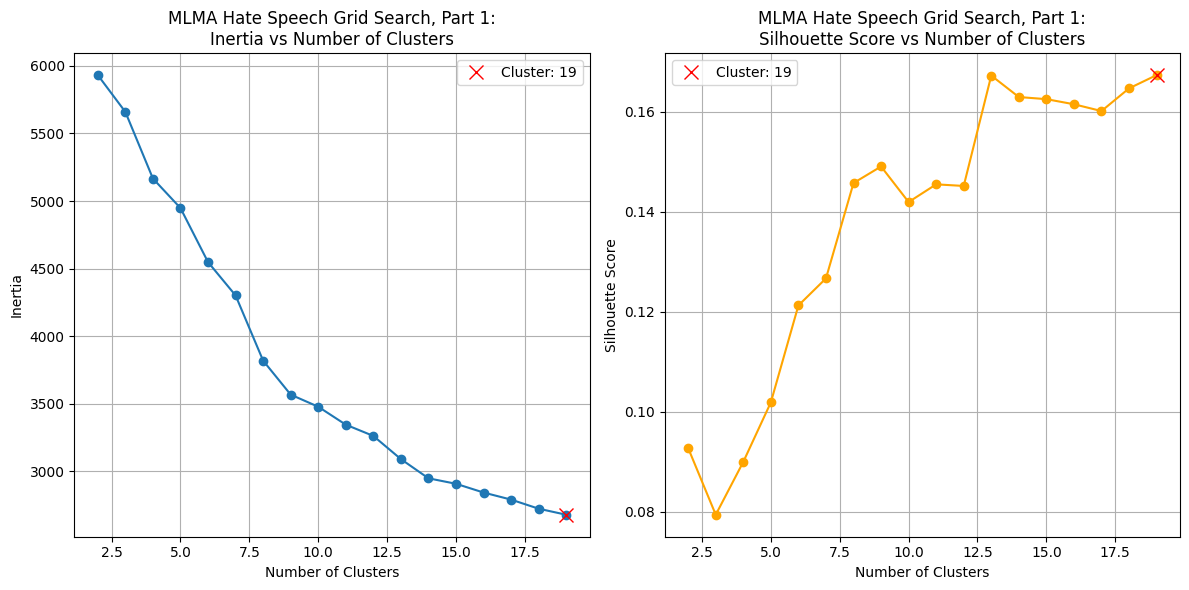

In [58]:
minibatch_mlma_hate_speech_inertia_list_p1, minibatch_mlma_hate_speech_silhouette_list_p1, minibatch_mlma_hate_speech_chosen_clusters_p1 = calculate_kmeans_scores_p1("MLMA Hate Speech", mlma_hate_speech_X_train_sample, mlma_hate_speech_kmeans_params)

Running KMeans with n_clusters=19, init=k-means++, max_iter=1, n_init=1
Running KMeans with n_clusters=19, init=k-means++, max_iter=1, n_init=2
Running KMeans with n_clusters=19, init=k-means++, max_iter=1, n_init=3
Running KMeans with n_clusters=19, init=k-means++, max_iter=1, n_init=4
Running KMeans with n_clusters=19, init=k-means++, max_iter=1, n_init=5
Running KMeans with n_clusters=19, init=k-means++, max_iter=1, n_init=6
Running KMeans with n_clusters=19, init=k-means++, max_iter=1, n_init=7
Running KMeans with n_clusters=19, init=k-means++, max_iter=1, n_init=8
Running KMeans with n_clusters=19, init=k-means++, max_iter=1, n_init=9
Running KMeans with n_clusters=19, init=k-means++, max_iter=1, n_init=10
Running KMeans with n_clusters=19, init=k-means++, max_iter=1, n_init=11
Running KMeans with n_clusters=19, init=k-means++, max_iter=1, n_init=12
Running KMeans with n_clusters=19, init=k-means++, max_iter=1, n_init=13
Running KMeans with n_clusters=19, init=k-means++, max_iter=

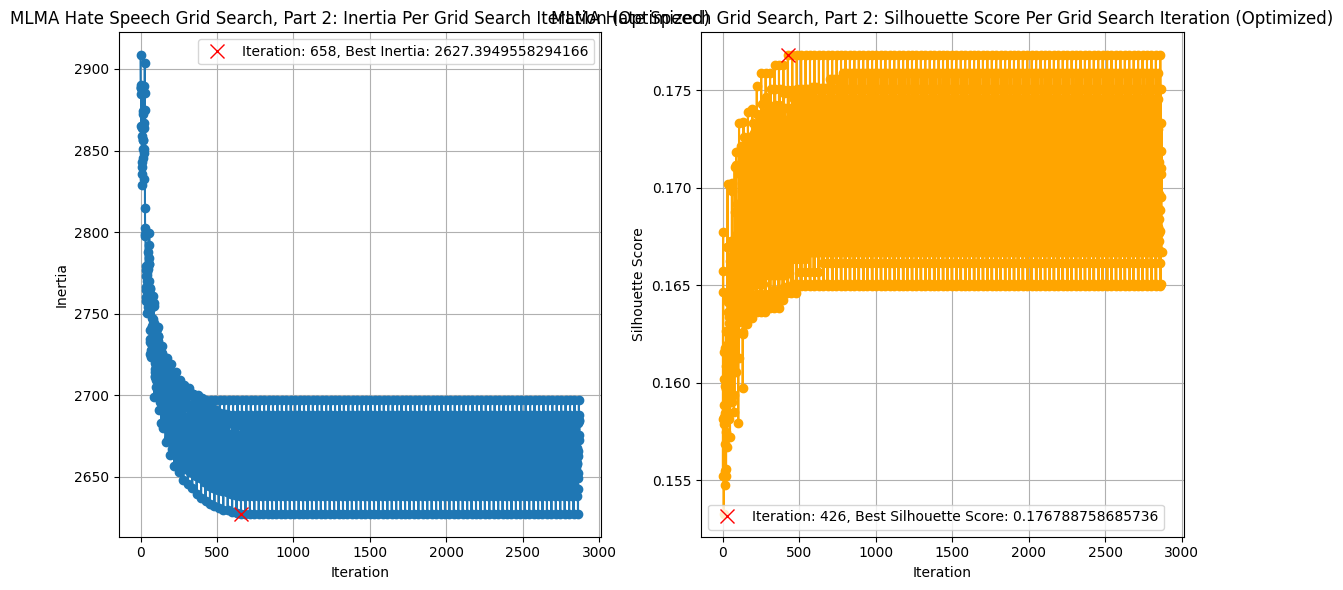

In [59]:
minibatch_mlma_hate_speech_inertia_list_p2, minibatch_mlma_hate_speech_silhouette_list_p2, minibatch_mlma_hate_speech_best_score_p2, minibatch_mlma_hate_speech_best_params_p2 = calculate_kmeans_scores_p2("MLMA Hate Speech", mlma_hate_speech_X_train_sample, mlma_hate_speech_kmeans_params, minibatch_mlma_hate_speech_chosen_clusters_p1)

Best Model Silhouette Score: 0.1037
Best Model Inertia: 3999.8646
Chosen Clusters Silhouette Score: 0.0974
Chosen Clusters Inertia: 2679.2389


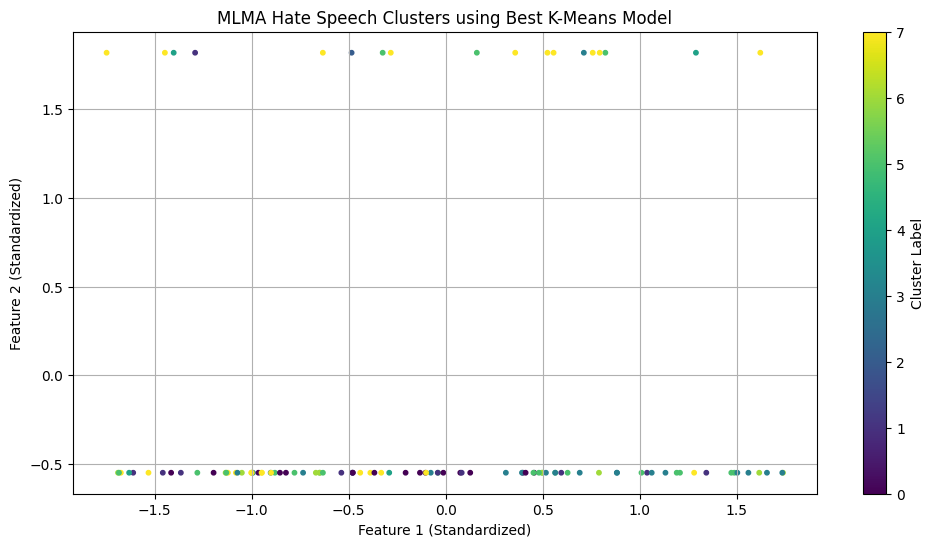

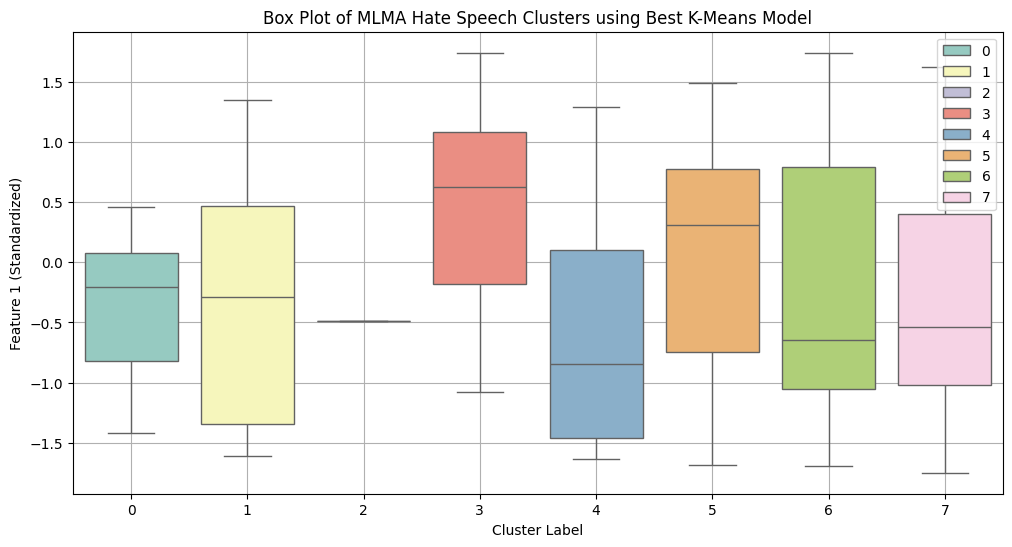

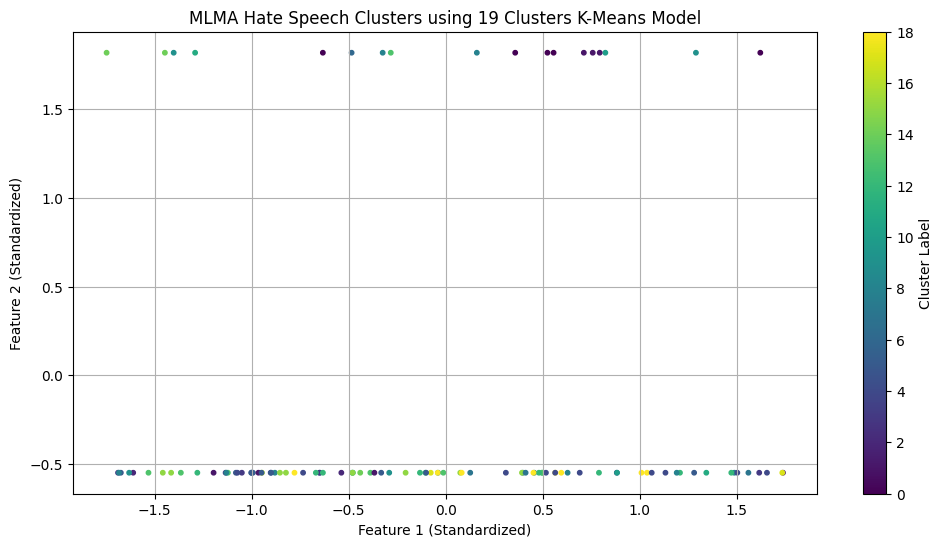

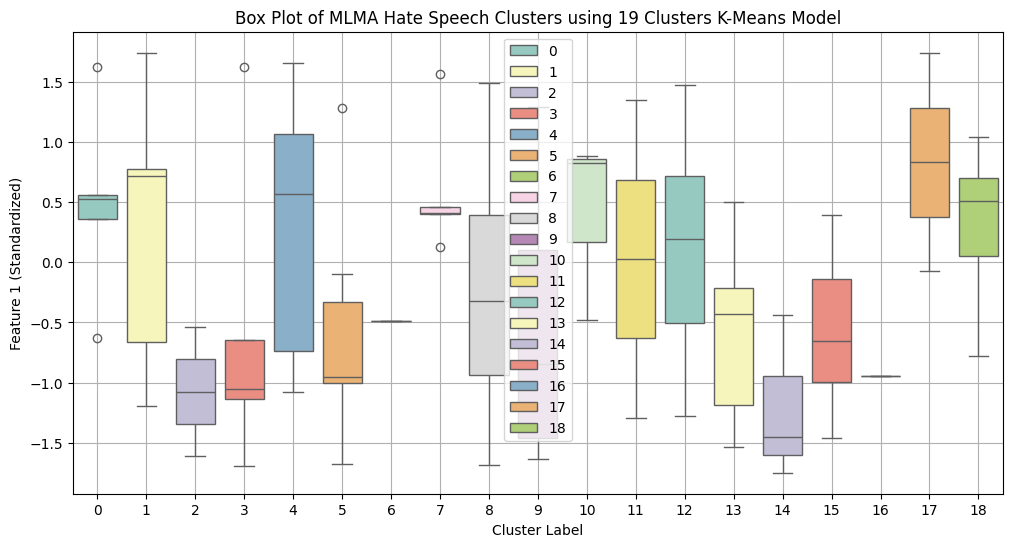

In [60]:
minibatch_mlma_hate_speech_best_model_silhouette_score, minibatch_mlma_hate_speech_best_model_inertia, minibatch_mlma_hate_speech_chosen_model_silhouette_score, minibatch_mlma_hate_speech_chosen_model_inertia = best_kmeans_model("MLMA Hate Speech", mlma_hate_speech_X_train_sample, mlma_hate_speech_X_test_sample, minibatch_mlma_hate_speech_best_params_p2, minibatch_mlma_hate_speech_chosen_clusters_p1)

## K-Means Clustering Conclusions

In [61]:
# Collect all relevant values
kmeans_results = [
    [
        "Convabuse", 
        minibatch_convabuse_best_model_silhouette_score, 
        minibatch_convabuse_best_model_inertia, 
        minibatch_convabuse_chosen_model_silhouette_score, 
        minibatch_convabuse_chosen_model_inertia, 
        minibatch_convabuse_best_params_p2
    ],
    [
        "Dynamically Generated Hate Speech", 
        minibatch_dghs_best_model_silhouette_score, 
        minibatch_dghs_best_model_inertia, 
        minibatch_dghs_chosen_model_silhouette_score, 
        minibatch_dghs_chosen_model_inertia, 
        minibatch_dghs_best_params_p2
    ], 
    [
        "US Elections 2020 Hate Speech", 
        minibatch_us2020hs_best_model_silhouette_score, 
        minibatch_us2020hs_best_model_inertia, 
        minibatch_us2020hs_chosen_model_silhouette_score, 
        minibatch_us2020hs_chosen_model_inertia, 
        minibatch_us2020hs_best_params_p2
    ], 
    [
        "MLMA Hate Speech", 
        minibatch_mlma_hate_speech_best_model_silhouette_score, 
        minibatch_mlma_hate_speech_best_model_inertia, 
        minibatch_mlma_hate_speech_chosen_model_silhouette_score, 
        minibatch_mlma_hate_speech_chosen_model_inertia, 
        minibatch_mlma_hate_speech_best_params_p2
    ], 
]

kmeans_results_df = pd.DataFrame(kmeans_results, columns=["Dataset", "Best Model Silhouette Score", "Best Model Inertia", "Chosen Model Silhouette Score", "Chosen Model Inertia", "Best Parameters"])
kmeans_results_df

,Dataset,Best Model Silhouette Score,Best Model Inertia,Chosen Model Silhouette Score,Chosen Model Inertia,Best Parameters
0,Convabuse,1.000000,4.843082e-28,1.000000,2.356035e-25,"{'init': 'k-means++', 'max_iter': 1, 'n_init': 1}"
1,Dynamically Generated Hate Speech,0.843802,1.681314e+03,0.998788,2.194413e+01,"{'init': 'k-means++', 'max_iter': 1, 'n_init': 8}"
2,US Elections 2020 Hate Speech,0.861034,2.994501e+00,0.727273,4.574390e-01,"{'init': 'k-means++', 'max_iter': 1, 'n_init':..."
3,MLMA Hate Speech,0.103699,3.999865e+03,0.097449,2.679239e+03,"{'init': 'k-means++', 'max_iter': 15, 'n_init'..."


In [62]:
kmeans_results_df.to_csv(f"{results_path}model10_kmeans-clustering-summary.csv", index=False)